# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

### Problem Statement 
An online news portal aims to expand its business by acquiring new subscribers.Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not to make whether the new landing page is more effective to gather new subscribers.

### Objectives 

A randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

1. Explore the dataset and extract insights using Exploratory Data Analysis.
2. Do the users spend more time on the new landing page than the existing landing page?
3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
4. Does the converted status depend on the preferred language? 
5. Is the time spent on the new page same for the different language users?

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [2]:
# write the code for reading the dataset abtest.csv
news = pd.read_csv('abtest.csv')

news.head(3)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish


In [3]:
news.tail(3)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [4]:
news.shape

(100, 6)

### observation : There are 100 rows and 6 columns

In [5]:
news.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


#### Observation:
1. Avg time spent on the page 5.37
2. Min time spent  0.19 
3. Max tmie spent on 10.71

In [6]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observation: There is 3 different Data types int(1), float(1), object(4)

#####  As is it observed there are 4 object data types converting them to category type for futher analysis

In [7]:
news.group = news.group.astype('category')
news.landing_page = news.landing_page.astype('category')
news.converted = news.converted.astype('category')
news.language_preferred = news.language_preferred.astype('category')

#### Checking the Data Types post conversion

In [8]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB



##### Observation : It is observed and confirmed that the object datatype has been converted to category|

#### checking data for any missing values

In [9]:
news.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#### Observation : There are zero missing values and the data is good for analysis

### checking the column unique values  

In [52]:
news.columns

Index(['user_id', 'group', 'landing_page', 'time_spent_on_the_page',
       'converted', 'language_preferred'],
      dtype='object')

In [10]:
# User id column
news.user_id.nunique()

100

#### Observation : There are 100 unique user ids

In [11]:
# Group column
news.group.value_counts()

control      50
treatment    50
Name: group, dtype: int64

#### Observation : There are two unique values control , treatment  with a count of 50 each

In [53]:
# Landing page column
news.landing_page.value_counts()

new    50
old    50
Name: landing_page, dtype: int64

#### Observation : There are two unique values new , old  with a count of 50 each

In [54]:
# Time spent on the page column
news.time_spent_on_the_page.nunique()

94

#### Observation : There are 94 unique values

In [55]:
# Converted column
news.converted.value_counts()

yes    54
no     46
Name: converted, dtype: int64

#### Observation : Total converted count is 54 and not converted is 46

In [56]:
# Language preferred column
news.language_preferred.value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

#### Observation : There are 3 preferred languages French, Spanish and English.

### Data Overview

1. There are 100 rows and 6 columns
2. Mean and Median values are very close which says the data is normally distributed
3. Avg time spent on the page 5.37
4. There is 3 different Data types int(1), float(1), object(4) post converting the object data type  to categorical data type the memory usage reduced from 4.8+ KB to 2.6 KB
5. There are zero missing values and the data is good for analysis
6. There are 100 unique User Ids
7. Data is divided into  two unique groups control(old landing page) , treatment(New landing page) with a count of 50 each
8. column showing the conversion with a count of 54 as converted and 46 not converted
9. There are 3 preferred languages French, Spanish and English

### Univariate Analysis

In [16]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

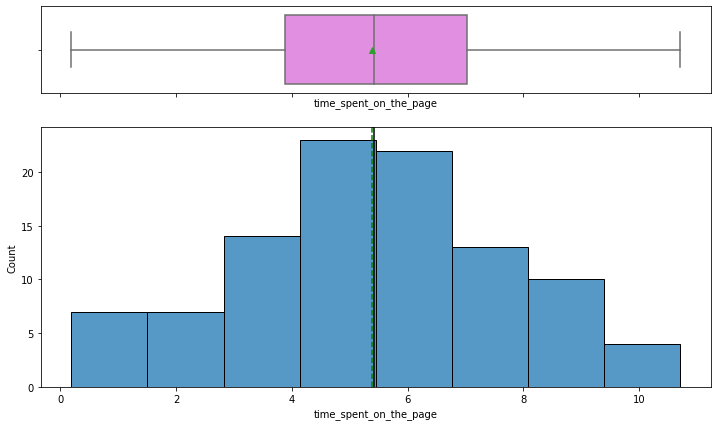

In [18]:
# Plotting a graph to view the distribution of the numerical column (time_spent_on_the_page)
histogram_boxplot( news, 'time_spent_on_the_page')

#### Observations
1. It is symmetrical distribution.
2. Shows a normal distribution
3. Avg time spent on the page is around 5 minutes
4. Mean and Median are very close which says the data is normall distributed

####  Plots for the categorical columns 

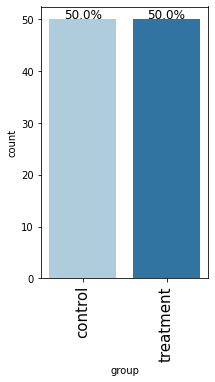

In [19]:
# Bar plot for the categorical column group

labeled_barplot ( news , 'group' , perc=True)

#### Observation

1. As mentioned in the porblem statement it was divided into two groups Old referred to as Control  Group ans New referred to as Treament Group. 
2. The data frame has equally provided for both the groups.

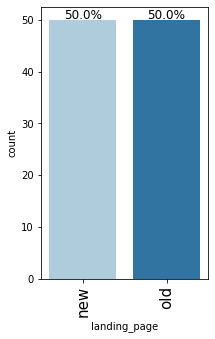

In [49]:
# Bar plot for the categorical column landing_page

labeled_barplot ( news , 'landing_page' , perc=True)

#### Observation 
1. New represents the new landing page 
2. Old represents the existing page 
3. As mentioned in the above chart the data is equally provided for both new and old page

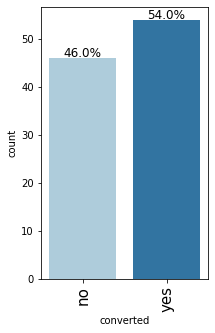

In [50]:
# # Bar plot for the categorical column converted

labeled_barplot ( news , 'converted' , perc=True)

#### Observation

1. As we can clearly see in the chart there is conversion rate is 54%

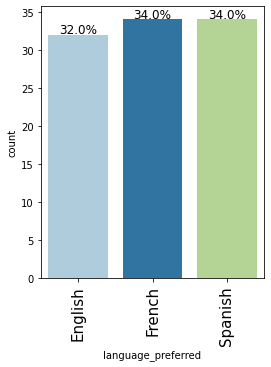

In [51]:
# Bar plot for the categorical column language_preferred

labeled_barplot ( news , 'language_preferred' , perc=True)

#### Observation
 1. Three preferred languages among English, French and Spanish
 2. French and Spanish is more preferred than English.

### Bivariate Analysis

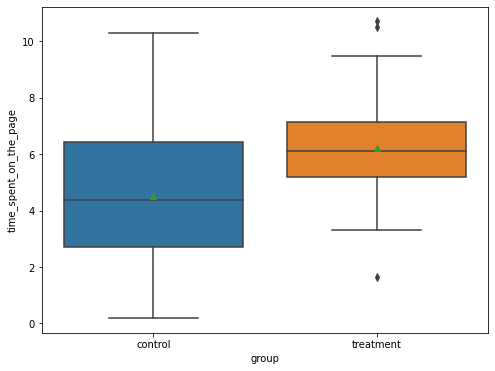

In [23]:
# Plot to show relation between Groups and the Time spent on the page

plt.figure(figsize=(8,6))
sns.boxplot(x ='group', y='time_spent_on_the_page',data = news,showmeans = True)
plt.show()

#### Observation
 1. The Mean value on the Treatment group is higher.
 2. Time spent on the Treatment group is more than the control group

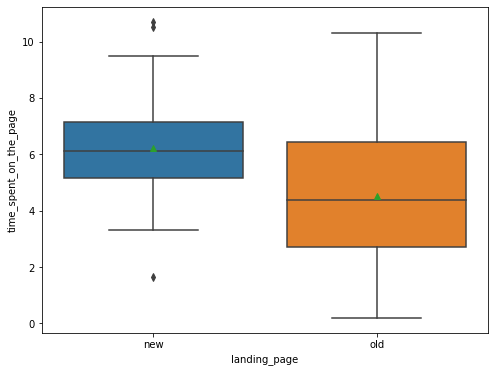

In [24]:
# Plot to show relation between landing_page and the Time spent on the page

plt.figure(figsize=(8,6))
sns.boxplot(x ='landing_page', y='time_spent_on_the_page',data = news,showmeans=True)
plt.show()

#### Observation
 1. The Mean value on the New landing page is higher.
 2. Time spent on the  is  New landing page more than Old landing page.

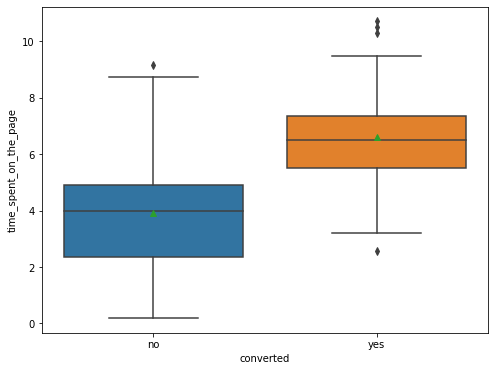

In [25]:
# Plot to show relation between converted and the Time spent on the page

plt.figure(figsize=(8,6))
sns.boxplot(x ='converted', y='time_spent_on_the_page',data = news,showmeans=True)
plt.show()

#### Observation
 1. The Mean value on the converted is higher.
 2. Time spent by the converted is more than not converted

## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

### Perform Visual Analysis

### Combined plot showing comparison of time spent on both the new and old landing pages together

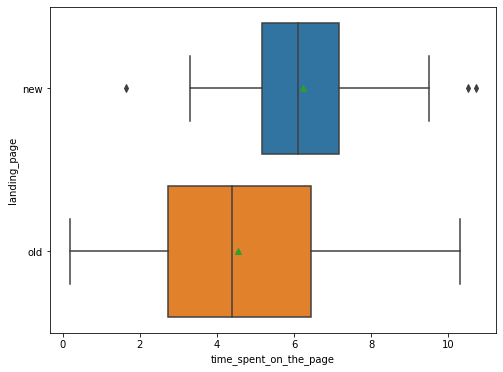

In [26]:
plt.figure(figsize=(8,6))
sns.boxplot(x ='time_spent_on_the_page', y='landing_page',data = news, showmeans=True)
plt.show()

#### Observation : The the Plot shows the mean value for New landing page is greater than the old landing page. Visually we can confirm users spend more time on the new landing page. Lets proceed with the hypothesis test to prove the same

###  Individual plots of New data and Old data

### New Group Plot

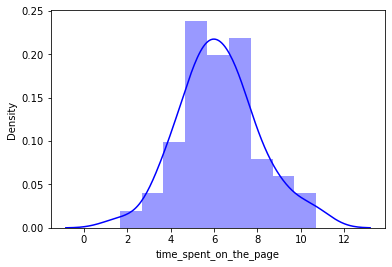

<function matplotlib.pyplot.show(close=None, block=None)>

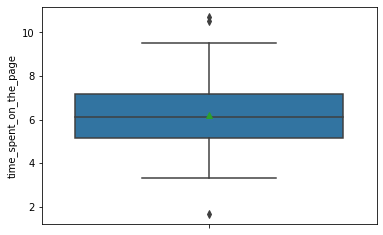

In [57]:
# Extracting new group data to plot a graph to see the distribution
new_group_plot = news[news['landing_page']== 'new']['time_spent_on_the_page'].reset_index()
sns.distplot(new_group_plot['time_spent_on_the_page'],color='blue')
plt.show()
    sns.boxplot(y='time_spent_on_the_page',data=new_group_plot,showmeans=True)
    plt.show

### Old Group Plot

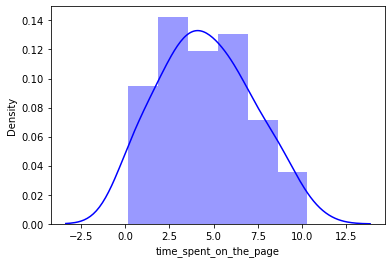

<function matplotlib.pyplot.show(close=None, block=None)>

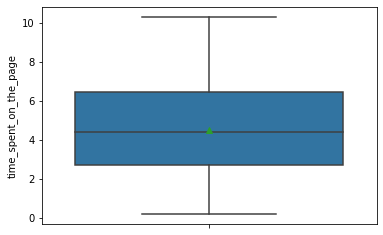

In [58]:
# Extracting old  group data to plot a graph to see the distribution 
old_group_plot = news[news['landing_page']== 'old']['time_spent_on_the_page'].reset_index()
sns.distplot(old_group_plot['time_spent_on_the_page'],color='blue')
plt.show()
sns.boxplot(y='time_spent_on_the_page',data=old_group_plot,showmeans=True)
plt.show

### Observation : As we can see the both the plots shows a normal distribution for both the samples New and Old

### Step 1: Define the null and alternate hypotheses

 Let μ1  and μ2 be the mean values of the new landing page and the old landing page
 
 null hypothesis stating time spent on pages are equal
 
 Ho :μ1 = μ2
 
 alternate hypothesis stating time spent on new page is greater than existing page
 
 Ha :μ1 > μ2

### Step 2: Select Appropriate test


* Continuous data - Yes, it is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

#### We can use two sample T-test for this problem

### Step 3: Decide the significance level

  Level of Significance is 0.05 as mentioned in the problem statement
  
  α = 0.05

### Step 4: Collect and prepare data

In [83]:
# Below is a DF for just the new group 
new_group = news[news['landing_page']== 'new']['time_spent_on_the_page']
# Below is a DF for just the old group
old_group = news[news['landing_page']== 'old']['time_spent_on_the_page']

In [60]:

### We need to get the mean  and std deviation values of both the samples for further calculations
new_group_mean = news[news['landing_page']== 'new']['time_spent_on_the_page'].mean()
print('The mean value of the new group is', round((new_group_mean),2))
old_group_mean = old_group = news[news['landing_page']== 'old']['time_spent_on_the_page'].mean()
print('The mean value of the old group is', round((old_group_mean),2))
new_group_std = news[news['landing_page']== 'new']['time_spent_on_the_page'].std()
print('The std dev value of the new group is', round((new_group_std),2))
old_group_std = old_group = news[news['landing_page']== 'old']['time_spent_on_the_page'].std()
print('The std dev value of the old group is', round((old_group_std),2))

The mean value of the new group is 6.22
The mean value of the old group is 4.53
The std dev value of the new group is 1.82
The std dev value of the old group is 2.58


### Step 5: Calculate the p-value

In [84]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat,p_value = ttest_ind(new_group, old_group,equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

*  P value = 0.0001392381225166549 
*  𝛼 value = 0.05 

#### P-value is less compared to the 𝛼 value ( level of significance )

### Step 7:  Draw inference

### Conclusion:
*  p value is less than  $\alpha$ level of significance
*  we  reject the Null hypothesis  
*  Can conclude that users spend more time on the new landing page than the existing landing page

**A similar approach can be followed to answer the other questions.**

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

### Perform Visual Analysis

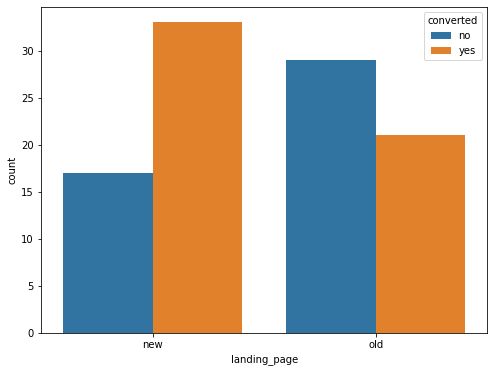

In [62]:
plt.figure(figsize=(8,6))
sns.countplot(news['landing_page'], hue = news['converted'] )
plt.show()

#### Observation : Visually the plot states the conversion rate on new page is greater than the old page. Lets proceed with the hypothesis test to prove the same

### Step 1: Define the null and alternate hypotheses

 Let P1 and P2 be the proportion of conversion rate of the two pages old and new
 
 null hypothesis stating conversion rate on both the pages are equal
 
 Ho :P1 = P2
 
 alternate hypothesis stating proportion of conersion rate on new page is greater than old page
 
 Ha :P1 > P2

### Step 2: Select Appropriate test

Two Proportion Z-test as it involves two proportions. we can confirm if it satisfies the assumptions for the Two proportion Z test ( please see below Step 5)

### Step 3: Decide the significance level

  Level of Significance is 0.05 as mentioned in the problem statement
  
  α = 0.05

### Step 4: Collect and prepare data

### For this test we need the conversion count and sample size of both the pages.

#### Getting the conversion count for both the pages 

In [63]:
# conversion count for the new page
new_converted_count = news[(news.landing_page == 'new')]['converted'].value_counts()
print(new_converted_count)

yes    33
no     17
Name: converted, dtype: int64


In [64]:
# conversion count for the old page
old_converted_count = news[(news.landing_page == 'old')]['converted'].value_counts()
print(old_converted_count)

no     29
yes    21
Name: converted, dtype: int64


In [65]:
print(' The conversion count for  new page and old page are:','33 and 21')

 The conversion count for  new page and old page are: 33 and 21


In [66]:
# As we now the count of the conversion for the individual pages. Setting the sample count for both new and old pages
conversion_count = np.array([33, 21])

#### Getting the sample size  for both the pages

In [67]:
#  checking for the sample size for both new and old page
print(news.landing_page.value_counts())
print('The sample  size for  new page and old page are:','50 and 50')

new    50
old    50
Name: landing_page, dtype: int64
The sample  size for  new page and old page are: 50 and 50


In [68]:
# As we now the sample size. Setting the sample size for both new and old pages
conv_sample_size = np.array([50, 50])

 ### Step 5: Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a product is either converted or not 
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} = 17 \geq 10 \\
np_2 = 50\cdot \frac{29}{50} =29 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-29}{375} =21 \geq 10 $

#### Observation : The values are greater than 10. Hence, we can confirm and continue with the Two Proportion Z-test

### Step 6: Calculate the p-value

#### As we now have the conversion count and sample size required for the Two Proportion Z-test lets now calculate the P- value

In [69]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# find the p-value
test_stat, p_value = proportions_ztest(conversion_count, conv_sample_size,alternative='larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Step 7: Compare the p-value with $\alpha$

*  P value = 0.008026308204056278
*  𝛼 value = 0.05 

#### P-value is less compared to the 𝛼 value ( level of significance )

### Step 8:  Draw inference

### Conclusion:
*  p value is less than  $\alpha$ level of significance
*  we  reject the Null hypothesis  
*  we can conclude that we have enough statistical  evidence to state that conversion rate for new page is greater than the old page

## 4. Is the conversion and preferred language are independent or related? (10 Marks)

### Perform Visual Analysis

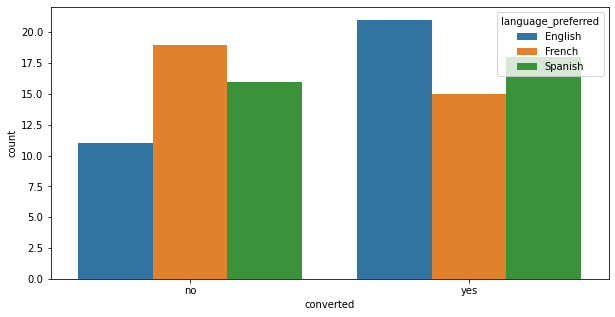

In [70]:
plt.figure(figsize=(10,5))
sns.countplot(news['converted'], hue = news['language_preferred'])
plt.show()

### Conclusion : As it shows in the plot English is the most preferred language. However, we cannot conclude if language and conversion are related or independant

### Step 1: Define the null and alternate hypothesis

We will test the null hypothesis

>$H_0:$ conversion and preferred language are independent 

against the alternate hypothesis

>$H_a:$ conversion and preferred language are related


### Step 2: Select Appropriate test

Chi-Square Test for Independence.we can confirm if it satisfies the assumptions for the Chi-Square Test ( please see below Step 5)


### Step 3: Decide the significance level

  Level of Significance is 0.05 as mentioned in the problem statement
  
  α = 0.05

### Step 4: Collect and prepare data

In [71]:
# Preparing a contingency table

news_crosstab = pd.crosstab(news['converted'],
                      news['language_preferred'])
print(news_crosstab)

language_preferred  English  French  Spanish
converted                                   
no                       11      19       16
yes                      21      15       18



### Step 5: Let's test whether the Z-test assumptions are satisfied or not


* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

### Step 6: Calculate the p-value

In [72]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(news_crosstab)
                                               
print('The p-value is', p_value)

The p-value is 0.21298887487543447



### Step 7: Compare the p-value with $\alpha$

*  P value = 0.21298887487543447
*  𝛼 value = 0.05 

#### P-value is greater compared to the 𝛼 value ( level of significance )

### Step 8:  Draw inference

As the p-value is greater than the significance level, we fail to reject the null hypothesis. Hence we cannot conclude if the conversion and language preferred are related.

## 5. Is the time spent on the new page same for the different language users? (10 Marks)

### Perform Visual Analysis

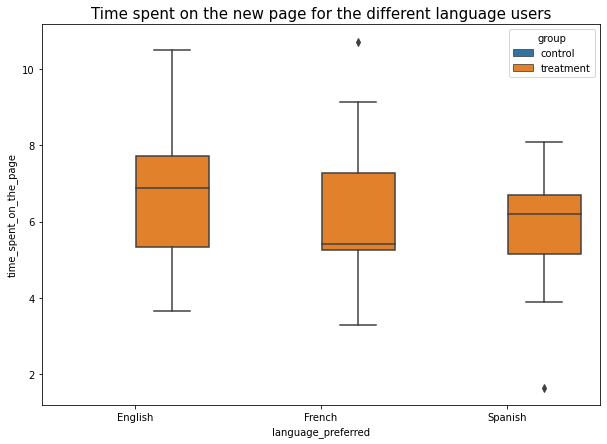

In [73]:
# Filtering to make a new data frame for the new landing page
new_landing_page = news[news['landing_page']== 'new']

# Plotting a Graph to see time spent on the new page for different language users
plt.figure(figsize=(10,7))
n =sns.boxplot( x= 'language_preferred', y = 'time_spent_on_the_page' , data = new_landing_page, hue = 'group' )
n.set_title("Time spent on the new page for the different language users", fontsize=15)
plt.show()

### Step 1: Define the null and alternate hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the new page for the languages English, French and Spanish respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one mean time spent on the new page is different from the rest.


### Step 2: Select Appropriate test

One-way ANOVA Test.we can confirm if it satisfies the assumptions for the One-way ANOVA Test( please see below Step 5)

### Step 3: Decide the significance level

Level of Significance is 0.05 as mentioned in the problem statement

α = 0.05    

### Step 4: Collect and prepare data

In [74]:
# Find out the unique language count
new_landing_page['language_preferred'].value_counts()

French     17
Spanish    17
English    16
Name: language_preferred, dtype: int64

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


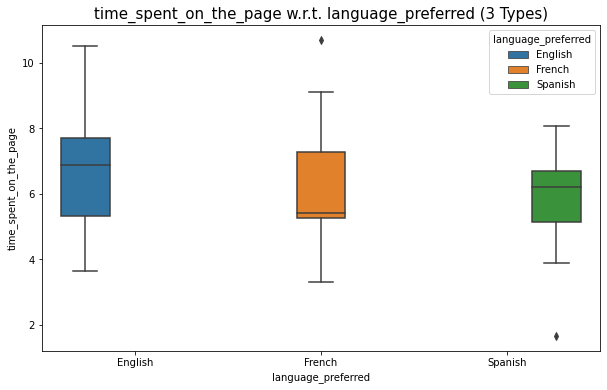

In [75]:
# Lets us now get the mean values of all the three languages for further analysis
print(new_landing_page.groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (10,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = new_landing_page, hue = 'language_preferred')
a.set_title("time_spent_on_the_page w.r.t. language_preferred (3 Types)", fontsize=15)
plt.show()

#### Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ time_spent_on_the_page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ time_spent_on_the_page does not follow a normal distribution

In [76]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(new_landing_page['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


#### Conclusion : Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [77]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( new_landing_page['time_spent_on_the_page'][new_landing_page['language_preferred']=="English"], 
                                   new_landing_page['time_spent_on_the_page'][new_landing_page['language_preferred']=="French"], 
                                   new_landing_page['time_spent_on_the_page'][new_landing_page['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


#### Conclusion : Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Step 5: Let's test whether the  One-way ANOVA Test assumptions are satisfied or not

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.



### Step 6: Calculate the p-value

In [78]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(new_landing_page.loc[new_landing_page['language_preferred']=="English", 'time_spent_on_the_page'],
                              new_landing_page.loc[new_landing_page['language_preferred']=="French", 'time_spent_on_the_page'],
                              new_landing_page.loc[new_landing_page['language_preferred']=="Spanish", 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 7: Compare the p-value with $\alpha$

*  P value = 0.43204138694325955
*  𝛼 value = 0.05 

#### P-value is greater compared to the 𝛼 value ( level of significance )

### Step 8:  Draw inference

As the p-value is greater than the significance level, we fail to reject the null hypothesis. Hence we can conclude that the time spent on the new page is same for the different language users

## Conclusion and Business Recommendations

### Conclusions  based on EDA and Hypothesis Tests on the Objectives given.


### 1. Do the users spend more time on the new landing page than the existing landing page?
 * conclusion: yes, user spend more on the landing page when compared to the existing page.


### 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
 *  conclusion: Yes, Based on the above analysis we have enough statiscal evidence to conclude that conversion is greater for the new page.


### 3. Does the converted status depend on the preferred language?
 * conclusion: No, the conversion rate is not dependant on the preferred language.


### 4. Is the time spent on the new page same for the different language users?
 * conclusion: yes,based on our analysis we can conclude that the time spent on the new page is same for the different language users

### Business Recommendations

1. There has been enough statiscal evidences to conclude that new landing page showed a good response from the customers.
2. Enough Evidence to conclude customers spend more time on the new page  and would expect more of the new content.
3. There has been not much evidence to conclude if the customers have a preferred language. Hence, adding a new langauge may or may not be of immediate profit.
4. However, adding a new language will add new content and might attract new customers.
5. Since, there has been a good conversion rate and response from the customers it is advisable and would be profitable to invest and expand the new landing page.
6. As it is clear that customers are spending more time on the new page and would soon run of content.It is recommended to come up with new content and features based on the customer interests.
7. Overall to conclude the new Landing page  is worthwhile and beneficial to the Business.